In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
dir_path = "../data/"

# Utils

In [3]:
from sklearn.metrics import mean_squared_error

def get_files_list(path):
    files = []
    for aname in os.listdir(path):
        if (aname[-3:] == "csv") or (aname[-3:] == "txt"): 
            files.append(os.path.join(path, aname))
    return files



def autoregression_matrix(X, n_size=10):
    X_auto = []
    for i in range(n_size-1, len(X)):
        ax_auto = X[i+1-n_size:i+1].reshape(-1,)
        X_auto.append(ax_auto)
    X_auto = np.stack(X_auto, axis=0)
    return X_auto

# Visual Inspection

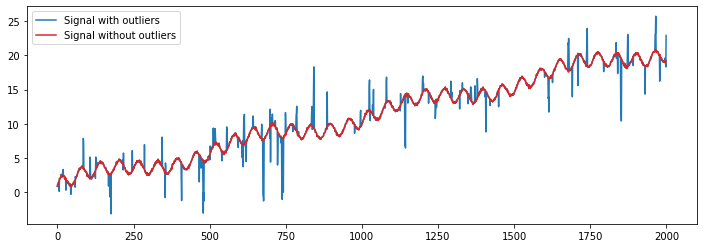

In [4]:
data = pd.read_csv("../data/sample5.csv", index_col=False)

# prepare signal with outliers (X) and clean true signal (X_true)
X_sig  = data['X'].values
X_true = data['Truth'].values

plt.figure(figsize=(12, 4))
plt.plot(X_sig, color='C0', alpha=0.99, label='Signal with outliers')
plt.plot(X_true, color='C3', alpha=0.99, label='Signal without outliers')
plt.legend(loc='best')
plt.show()

# Prediction

In [5]:
n_predict = 1
n_history = 20

X = data['X'].values

X_auto = autoregression_matrix(X, n_size=n_history)
X_prep = X_auto[:-n_predict]

Y_auto = autoregression_matrix(X, n_size=n_predict)[:, -1]
Y_prep = Y_auto[n_history:]

T = np.arange(len(X))[n_history+n_predict-1:]

In [6]:
X.shape, X_auto.shape, X_prep.shape, Y_prep.shape, T.shape

((2000,), (1981, 20), (1980, 20), (1980,), (1980,))

In [7]:
X_train = X_prep#[::2]
Y_train = Y_prep#[::2]
T_train = T#[::2]

X_test = X_prep#[1::2]
Y_test = Y_prep#[1::2]
T_test = T#[1::2]

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

#reg = LinearRegression(normalize=True)
#reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2)
#reg = RandomForestRegressor(n_estimators=1000, max_depth=6, max_features=0.1)
reg = Ridge(normalize=True, alpha=0.01)
#reg = RANSACRegressor(base_estimator=LinearRegression(normalize=True), min_samples=50, stop_probability=0.999)
#reg = BaggingRegressor(base_estimator=LinearRegression(normalize=True), n_estimators=1000, max_features=0.5, max_samples=1.0)
reg.fit(X_train, Y_train)

Y_test_pred = reg.predict(X_test)

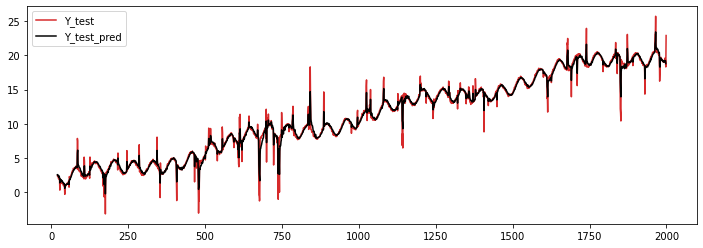

In [9]:
# prepare signal with outliers (X) and clean true signal (X_true)

plt.figure(figsize=(12, 4))
#plt.plot(X_sig, color='C0', alpha=0.99, label='Signal with outliers')
#plt.plot(X_true, color='C3', alpha=0.99, label='Signal without outliers')
plt.plot(T_test, Y_test, color='C3', alpha=0.99, label='Y_test')
plt.plot(T_test[:-n_predict], Y_test_pred[n_predict:], color='0', alpha=0.99, label='Y_test_pred')
plt.legend(loc='best')
plt.show()

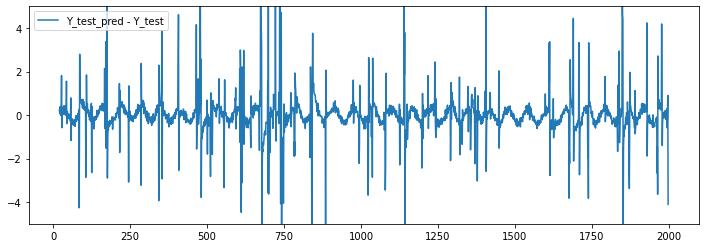

In [10]:
plt.figure(figsize=(12, 4))
res = Y_test_pred[n_predict:] - Y_test[n_predict:]
plt.plot(T_test[:-n_predict], res, color='C0', alpha=0.99, label='Y_test_pred - Y_test')
plt.ylim(-5, 5)
plt.legend(loc='best')
plt.show()